# Acessing Data

In [0]:
#Importing all dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import  svm,datasets,  tree, preprocessing, metrics #,cross_validation
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import seaborn as sns
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

Loading the data and previewing the train file

In [0]:
Train = pd.read_csv('train.csv')
Test = pd.read_csv('test.csv')
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Feature datatypes and info

In [0]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Visulaization

To better understand the data distribution and other properties 

In [0]:

#Checking for the features which have null values 
print('Train columns with null values:\n', Train.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', Test.isnull().sum())
print("-"*10)

Train.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Masselmani, Mrs. Fatima",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


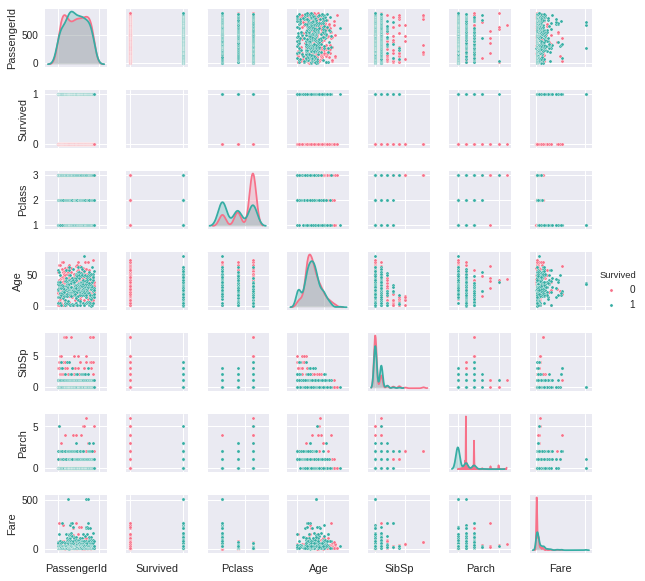

In [0]:
#pair plots of entire dataset
pp = sns.pairplot(Train, hue = 'Survived', palette = 'husl', size=1.2, diag_kind = 'kde' , diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

# Feature Extraction and Feature Engineering 

We can extract Titles of each passenger name so that their status and chance of survival can be better exposed.
And also FamilySize and IsAlone features are added from SinSp and Parch. 

In [0]:
data_cleaner = [Train, Test]
for dataset in data_cleaner:    
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
#grouping Titles appropriately 
Train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Jonkheer          1
Don               1
Sir               1
the Countess      1
Ms                1
Capt              1
Lady              1
Mme               1
Name: Title, dtype: int64

In [0]:
Title_Dictionary = {
        "Capt":       "Officer",
        "Col":        "Officer",
        "Major":      "Officer",
        "Dr":         "Officer",
        "Rev":        "Officer",
        "Jonkheer":   "Royalty",
        "Don":        "Royalty",
        "Sir" :       "Royalty",
        "the Countess":"Royalty",
        "Dona":       "Royalty",
        "Lady" :      "Royalty",
        "Mme":        "Mrs",
        "Ms":         "Mrs",
        "Mrs" :       "Mrs",
        "Mlle":       "Miss",
        "Miss" :      "Miss",
        "Mr" :        "Mr",
        "Master" :    "Master"
                   }
Train['Title'] = Train.Title.map(Title_Dictionary)
Test['Title'] = Test.Title.map(Title_Dictionary)
Train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr


In [0]:
#Updated categories 
Train['Title'].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

## Data cleaning


In [0]:
# Re-checing the features for missing values 
print(len(Train))
all_data_na = (Train.isnull().sum() / len(Train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
print(all_data_na)

print(len(Test))
all_data_na = (Test.isnull().sum() / len(Test)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
print(all_data_na)

891
Cabin       77.104377
Age         19.865320
Embarked     0.224467
dtype: float64
418
Cabin    78.229665
Age      20.574163
Fare      0.239234
dtype: float64


In [0]:
#Removing the features which doesnt impact the surviour classification
PassengerID = Test['PassengerId']
del Train['PassengerId']
del Train['Cabin']
del Train['Name']
del Train['Ticket']

del Test['PassengerId']
del Test['Cabin']
del Test['Name']
del Test['Ticket']


In [0]:
#Imputing the missing values
Train['Age'] = Train['Age'].fillna(Train['Age'].median())
Train['Embarked'] = Train['Embarked'].fillna(Train['Embarked'].mode()[0])

Test['Age'] = Test['Age'].fillna(Test['Age'].median())
Test['Fare'] = Test['Fare'].fillna(Test['Fare'].mode()[0])

In [0]:
#Finally displaying the cleaned files 
Train.head()
Test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,3,male,34.5,0,0,7.8292,Q,1,1,Mr
1,3,female,47.0,1,0,7.0000,S,2,0,Mrs
2,2,male,62.0,0,0,9.6875,Q,1,1,Mr
3,3,male,27.0,0,0,8.6625,S,1,1,Mr
4,3,female,22.0,1,1,12.2875,S,3,0,Mrs


# Encoding Features

We encode the catogorical features so that features like Embarked which have values like Q, S .. are converted to numericals so that the ml algos can accept them as input.

In [0]:
from sklearn.preprocessing import LabelEncoder
cols = ( 'Sex', 'Embarked', 'Title')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(Train[c].values)) 
    Train[c] = lbl.transform(list(Train[c].values))

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(Test[c].values)) 
    Test[c] = lbl.transform(list(Test[c].values))

In [0]:
Train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476,1.904602,0.602694,1.903479
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503,1.613459,0.489615,0.807061
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000,1.000000,1.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,11.000000,1.000000,5.000000


In [0]:
y =Train['Survived']
X = Train.drop(['Survived'], axis=1)

In [0]:
# Normalizing the dataset to make sure all the data is in range of 0 to 1 
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
TestX = scaler.fit_transform(Test)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [0]:
#Normalized Data
print(TestX)

[[1.         1.         0.4527232  ... 0.         1.         0.4       ]
 [1.         0.         0.61756561 ... 0.1        0.         0.6       ]
 [0.5        1.         0.8153765  ... 0.         1.         0.4       ]
 ...
 [1.         1.         0.50547277 ... 0.         1.         0.4       ]
 [1.         1.         0.35381775 ... 0.         1.         0.4       ]
 [1.         1.         0.35381775 ... 0.2        0.         0.        ]]


# Model Creation

In [0]:
#Model with default parameters 
model = XGBClassifier()
model.fit(rescaledX, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [0]:
y_predXGB = model.predict(TestX)
#Gave 78% accuracy on final test data

[0.07590759 0.06435644 0.28547856 0.05610561 0.00660066 0.33168316
 0.03630363 0.0660066  0.         0.07755776]


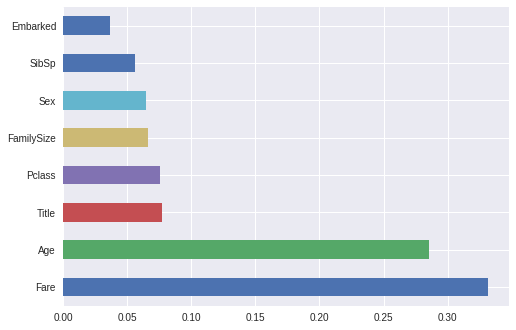

In [0]:
print(model.feature_importances_)
# plot_importance(model)
# pyplot.show()
(pd.Series(model.feature_importances_, index=X.columns)
   .nlargest(8)
   .plot(kind='barh'))


In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
n_estimators = [50, 100, 150, 200]
max_depth = [2, 4, 6, 8]
param_grid = dict(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(rescaledX, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.394785 using {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}
-0.691074 (0.000146) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 50}
-0.689022 (0.000290) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 100}
-0.686989 (0.000434) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 150}
-0.684975 (0.000574) with: {'learning_rate': 0.0001, 'max_depth': 2, 'n_estimators': 200}
-0.690703 (0.000193) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 50}
-0.688282 (0.000384) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 100}
-0.685884 (0.000571) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 150}
-0.683509 (0.000757) with: {'learning_rate': 0.0001, 'max_depth': 4, 'n_estimators': 200}
-0.690623 (0.000225) with: {'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 50}
-0.688120 (0.000446) with: {'learning_rate': 0.0001, 'max_depth': 6, 'n_estimators': 100}
-0.685647 (0.000661) 

The preformance to 80% with changing parameters 

In [0]:
model = XGBClassifier(learning_rate= 0.2, max_depth = 2, n_estimators = 100)
model.fit(rescaledX, y)
y_predXGBGridSearched = model.predict(TestX)


In [0]:
#Decision tree model creation
destree = tree.DecisionTreeClassifier()
destree.fit(rescaledX, y)
ydecpredTree = destree.predict(TestX)

In [0]:
GBC = GradientBoostingClassifier(n_estimators=50)
GBC.fit(rescaledX, y)
ydecpredTree = GBC.predict(TestX)

In [0]:
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(rescaledX, y)

Y_predRF = random_forest.predict(TestX)

In [0]:
submission = pd.DataFrame({
        "PassengerId": PassengerID,
        "Survived": ydecpredTree
    })
from google.colab import files
submission.to_csv('titanic.csv', index=False)
#best performance so far is got with GradientBoostingClassifier 81.33 % with top 6% on leaderboard
